# Final project
## Team member
- Yiran Shen (48907570)
- Rylee Wang (95006185)
- Yeongu Choe (77672566)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Topic: We are trying to find impact of COVID on Tourism industry

## Read CSV files

In [3]:
rawHomeRestrictionData = pd.read_csv("./src/stay-at-home-covid.csv")
rawFaceCoveringData = pd.read_csv("./src/face-covering-policies-covid.csv")
rawInternationalTravelControlData = pd.read_csv("./src/international-travel-covid.csv")
monthlyCanadaHotelInfo = pd.read_csv("./src/MonthlyCanadaHotel.csv")

### Extract data from US, Canada, Mexico, Brazil, China, Japan and South Korea

In [4]:
# 0: No policy
# 1: Recommended by government not to leave home
# 2: Required not to leave except for grocery shopping
# 3: Required not to leave home
HomeRestriction = rawHomeRestrictionData.loc[(rawHomeRestrictionData["Entity"] == "United States")
                                             | (rawHomeRestrictionData["Entity"] == "Canada")
                                             | (rawHomeRestrictionData["Entity"] == "Mexico")
                                             | (rawHomeRestrictionData["Entity"] == "Brazil")
                                             | (rawHomeRestrictionData["Entity"] == "China")
                                             | (rawHomeRestrictionData["Entity"] == "Japan")
                                             | (rawHomeRestrictionData["Entity"] == "South Korea")]
HomeRestriction


,Entity,Code,Day,stay_home_requirements
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
192978,United States,USA,2022-12-27,1
192979,United States,USA,2022-12-28,1
192980,United States,USA,2022-12-29,1
192981,United States,USA,2022-12-30,1


In [5]:
# 0: No policy
# 1: Recommended by government
# 2: Required in some public spaces
# 3: Required in all public spaces
# 4: Required outdoor all times
FaceCoveringPolicy = rawFaceCoveringData.loc[(rawFaceCoveringData["Entity"] == "United States")
                                       | (rawFaceCoveringData["Entity"] == "Canada")
                                       | (rawFaceCoveringData["Entity"] == "Mexico")
                                       | (rawFaceCoveringData["Entity"] == "Brazil")
                                       | (rawFaceCoveringData["Entity"] == "China")
                                       | (rawFaceCoveringData["Entity"] == "Japan")
                                       | (rawFaceCoveringData["Entity"] == "South Korea")]
FaceCoveringPolicy


,Entity,Code,Day,facial_coverings
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
193264,United States,USA,2022-12-27,2
193265,United States,USA,2022-12-28,2
193266,United States,USA,2022-12-29,2
193267,United States,USA,2022-12-30,2


In [6]:
# 0: No policy
# 1: Screening travellers
# 2: 2 weeks quarantine for travellers from high risk regions
# 3: Ban any travellers from high risk countries
# 4: Close border (No foreigners enter the country)
InternationalTravelControl = rawInternationalTravelControlData.loc[(rawInternationalTravelControlData["Entity"] == "United States")
                                          | (rawInternationalTravelControlData["Entity"] == "Canada")
                                          | (rawInternationalTravelControlData["Entity"] == "Mexico")
                                          | (rawInternationalTravelControlData["Entity"] == "Brazil")
                                          | (rawInternationalTravelControlData["Entity"] == "China")
                                          | (rawInternationalTravelControlData["Entity"] == "Japan")
                                          | (rawInternationalTravelControlData["Entity"] == "South Korea")]
InternationalTravelControl


,Entity,Code,Day,international_travel_controls
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
192986,United States,USA,2022-12-27,1
192987,United States,USA,2022-12-28,1
192988,United States,USA,2022-12-29,1
192989,United States,USA,2022-12-30,1


In [75]:
CanadaHotelOccupancyRate = monthlyCanadaHotelInfo.iloc[:,2]
CanadaHotelOccupancyRate


0      50.4%
1      58.4%
2      32.1%
3      13.6%
4      18.8%
5      24.8%
6      33.7%
7      41.8%
8      38.4%
9      31.4%
10     27.8%
11     22.5%
12     22.5%
13     27.5%
14     32.4%
15     29.7%
16     28.3%
17     36.9%
18     54.6%
19       66%
20     58.4%
21     51.6%
22     49.7%
23     42.6%
24     32.6%
25     43.8%
26     53.2%
27     57.5%
28     63.3%
29       72%
30     75.9%
31     76.6%
Name:  Occupancy Rate, dtype: object

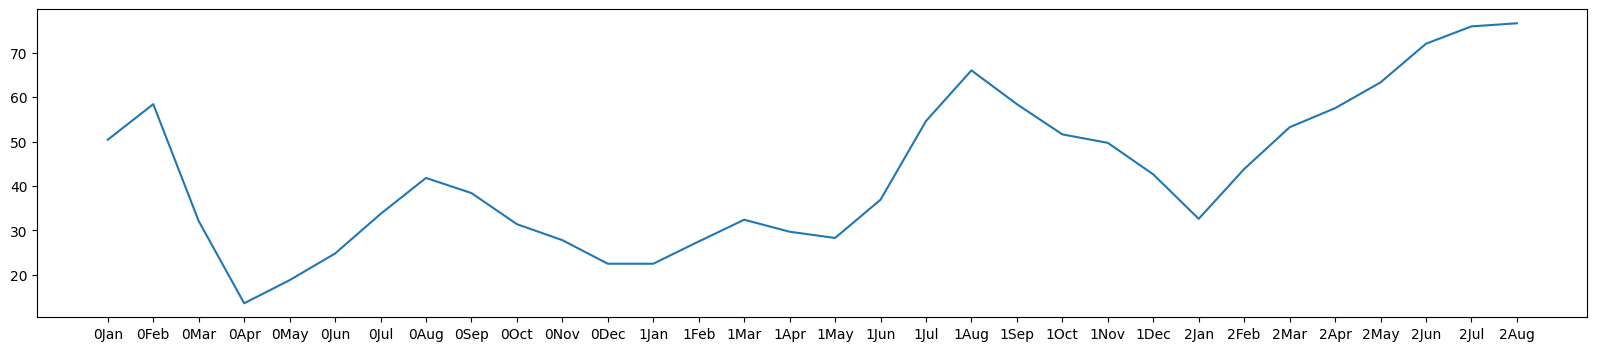

In [103]:
# Generate months and assign it to x
def getMonths(year):
    year = str(year)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for i in range(12):
        months[i] = year+months[i]
    return months


x = getMonths(0)+getMonths(1)+getMonths(2)
x = x[:32]  # Get year,month to 2022 Jun

# Convert str to int and assign the list to y


def getOccupancies(occupancyList):
    percentageList = []
    for i in range(len(occupancyList)):
        theStr = occupancyList[i][1:]
        theStr = theStr.strip("%")
        percentageList.append(float(theStr))
    return percentageList


y = getOccupancies(CanadaHotelOccupancyRate)

# Make it into graph
fig,ax = plt.subplots(figsize=(20, 4))
ax.plot(x,y)

